In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [282]:
income_data = pd.read_csv("historical_income.csv")
income = pd.DataFrame(income_data)
income.head()
income["Per Capita Adjusted for 2017 USD"] = income["Per Capita Adjusted for 2017 USD"].str.replace(",", "")


income["Per Capital Adjusted for 2017 USD"] = pd.to_numeric(income["Per Capita Adjusted for 2017 USD"])
income.style.format({
    "Per Capital Adjusted for 2017 USD": "${:.2}".format})
income1 = income[:19]



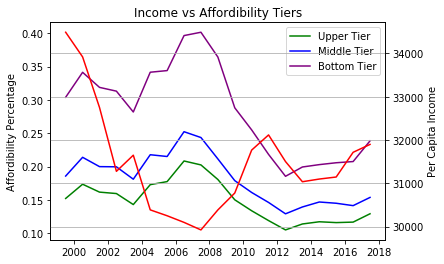

In [287]:
per_capita = income1["Per Capital Adjusted for 2017 USD"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], "g-")
ax1.plot(date, mort_df4["Middle Tier"], "b-")
ax1.plot(date, mort_df4["Bottom Tier"], "purple")
ax2.plot(date, per_capita, "r-")
plt.title("Income vs Affordibility Tiers")
plt.xlabel("Unemployment Rate")
ax1.set_ylabel("Affordibility Percentage")
ax2.set_ylabel("Per Capita Income")
plt.grid()
ax1.legend()


In [220]:
labor_data = pd.read_csv("labor_stats.csv")
labor_data["Annual"] = labor_data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].mean(axis=1)
labor2 = labor_data.drop(labor_data.index[:19])
Mar = labor_data["Mar"]
Jun = labor_data["Jun"]
Sep = labor_data["Sep"]
Dec = labor_data["Dec"]
Avg = labor_data["Annual"]
Mar1 = Mar[19:]
Jun1 = Jun[19:]
Sep1 = Sep[19:]
Dec1 = Dec[19:]

labor2
unemp = list(zip(Mar1, Jun1, Sep1, Dec1))
unemp1 = pd.Series(unemp).values
unemp2 = np.concatenate(unemp1)
unemp2

array([4.2, 4.3, 4.2, 4. , 4. , 4. , 3.9, 3.9, 4.3, 4.5, 5. , 5.7, 5.7,
       5.8, 5.7, 6. , 5.9, 6.3, 6.1, 5.7, 5.8, 5.6, 5.4, 5.4, 5.2, 5. ,
       5. , 4.9, 4.7, 4.6, 4.5, 4.4, 4.4, 4.6, 4.7, 5. , 5.1, 5.6, 6.1,
       7.3, 8.7, 9.5, 9.8, 9.9, 9.9, 9.4, 9.5, 9.3, 9. , 9.1, 9. , 8.5,
       8.2, 8.2, 7.8, 7.9, 7.5, 7.5, 7.2, 6.7, 6.7, 6.1, 5.9, 5.6, 5.4,
       5.3, 5. , 5. , 5. , 4.9, 5. , 4.7, 4.4, 4.3, 4.2, 4.1, 4. , 4. ,
       3.7, 3.9])

In [221]:
education_data = pd.read_csv("education_vs_income.csv", skiprows = 4)
education_data.rename(columns = {
    "Unnamed: 3": "Median Income in 2017 USD",
    "Unnamed: 5": "Mean Income in 2017 USD"}, inplace=True)

education_data["Educational Attainment"] = ""
education_data.iloc[1:32, education_data.columns.get_loc("Educational Attainment")] = "Total"
education_data.iloc[32:60, education_data.columns.get_loc("Educational Attainment")] = "9th Grade"
education_data.iloc[63:91, education_data.columns.get_loc("Educational Attainment")] = "High School No Diploma"
education_data.iloc[94:122, education_data.columns.get_loc("Educational Attainment")] = "GED or HS Diploma"
education_data.iloc[125:153, education_data.columns.get_loc("Educational Attainment")] = "Some College"
education_data.iloc[156:184, education_data.columns.get_loc("Educational Attainment")] = "Associate Degree"
education_data.iloc[187:215, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree or More"
education_data.iloc[218:246, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree"
education_data.iloc[249:277, education_data.columns.get_loc("Educational Attainment")] = "Master's Degree"
education_data.iloc[280:308, education_data.columns.get_loc("Educational Attainment")] = "Professional Degree"
education_data.iloc[311:339, education_data.columns.get_loc("Educational Attainment")] = "Doctorate Degree"

edu_data = education_data.dropna(axis=0, how="any")
edu_csv = open("Education_Data_Cleaned.csv", "w")
csv.writer(edu_csv)
edu_data.to_csv("Education_Data_Cleaned.csv")
edu_data

,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment
1,2017,"121,375","62,625","62,625","87,734","87,734",Total
2,2016,"119,985","60,523","61,825","84,538","86,356",Total
3,2015,"119,457","58,044","60,057","80,837","83,640",Total
4,2014,"118,217","55,283","57,299","77,297","80,115",Total
5,2013 (39),"117,279","55,407","58,400","76,898","81,052",Total
6,2013 (38),"116,628","53,231","56,106","74,144","78,149",Total
7,2012,"116,145","52,119","55,748","72,883","77,958",Total
8,2011,"114,904","51,244","55,973","71,329","77,912",Total
9,2010 (37),"113,696","50,699","57,123","68,918","77,651",Total
10,2009 (36),"111,305","50,971","58,377","69,522","79,624",Total


In [222]:
mort_csv = open("tieredaffordability_mortgage.csv")
mort_df = (pd.read_csv(mort_csv))

mort_df1 = mort_df.drop(mort_df.index[3:])
mort_df1
#mort_df1 = mort_df1.T
#mort_df1.drop(mort_df1.index[:3])
#mort_df1
#mort_csv = open("Mort_Data_Cleaned.csv", "w")
#csv.writer(mort_csv)
#mort_df1.to_csv("Mort_Data_Cleaned.csv")
#mort_df1.head()


,RegionID,RegionName,PopRank,tier,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,2000-09-30,...,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30
0,102001,United States,0,Bottom Tier,0.303985,0.316021,0.323100,0.337265,0.341345,0.331888,...,0.198006,0.205808,0.205446,0.210353,0.206243,0.207603,0.209890,0.235805,0.241146,0.238614
1,102001,United States,0,Middle Tier,0.185879,0.193666,0.200559,0.210686,0.213967,0.207215,...,0.140809,0.145112,0.144375,0.146110,0.142303,0.141536,0.141410,0.156327,0.157769,0.153850
2,102001,United States,0,Upper Tier,0.152307,0.158555,0.162713,0.170843,0.173628,0.168954,...,0.112647,0.116110,0.116479,0.119109,0.116787,0.116844,0.117129,0.130298,0.132079,0.129346


In [223]:
mort_csv = open("mort_data_cleaned1.csv")
mort_df2 = (pd.read_csv(mort_csv))
mort_df2["Unemployment"] = [4.2, 4.3, 4.2, 4. , 4. , 4. , 3.9, 3.9, 4.3, 4.5, 5. , 5.7, 5.7,
       5.8, 5.7, 6. , 5.9, 6.3, 6.1, 5.7, 5.8, 5.6, 5.4, 5.4, 5.2, 5. ,
       5. , 4.9, 4.7, 4.6, 4.5, 4.4, 4.4, 4.6, 4.7, 5. , 5.1, 5.6, 6.1,
       7.3, 8.7, 9.5, 9.8, 9.9, 9.9, 9.4, 9.5, 9.3, 9. , 9.1, 9. , 8.5,
       8.2, 8.2, 7.8, 7.9, 7.5, 7.5, 7.2, 6.7, 6.7, 6.1, 5.9, 5.6, 5.4,
       5.3, 5. , 5. , 5. , 4.9, 5. , 4.7, 4.4, 4.3, 4.2, 4.1, 4. , 4. ,
       3.7]
mort_df3 = mort_df2.drop(mort_df2.index[-6:])
#mort_df4 = mort_df3[mort_df3.tier != '6/']
#mort_df3[mort_df3.tier != '3/']

mort_df4 = mort_df3[::4]

mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]] = mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]].apply(pd.to_numeric)

mort_df4["Unemployment"] = mort_df4["Unemployment"].div(100)
mort_df4.style.format({
    "Unemployment": "{:.2%}".format,
    "Upper Tier": "{:.2%}".format,
    "Middle Tier": "{:.2%}".format,
    "Bottom Tier": "{:.2%}".format})
mort_df4["tier"] = pd.to_datetime(mort_df4["tier"])
mort_df4.dtypes

C:\Users\lorie\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\lorie\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\lorie\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

tier            datetime64[ns]
Bottom Tier            float64
Middle Tier            float64
Upper Tier             float64
Unemployment           float64
dtype: object

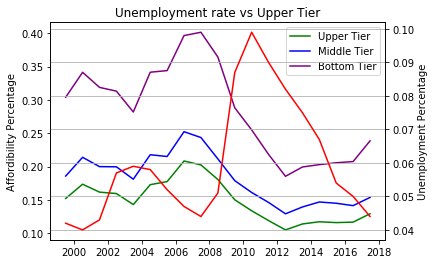

In [224]:
rate = mort_df4["Unemployment"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], "g-")
ax1.plot(date, mort_df4["Middle Tier"], "b-")
ax1.plot(date, mort_df4["Bottom Tier"], "purple")
ax2.plot(date, mort_df4["Unemployment"], "r-")
plt.title("Unemployment rate vs Upper Tier")
plt.xlabel("Unemployment Rate")
ax1.set_ylabel("Affordibility Percentage")
ax2.set_ylabel("Unemployment Percentage")
plt.grid()
ax1.legend()